# Croston method

In [8]:
import sys
sys.path.append('D:/source/repos')
from utilities.std_imports import *

In [9]:
def croston(ts, extra_periods=1, alpha=0.4):
    d = np.array(ts)
    cols = len(d) 
    d = np.append(d,[np.nan] * extra_periods) 
    
    #level (a), periodicity(p) and forecast (f)
    a,p,f = np.full((3, cols+extra_periods), np.nan)
    q = 1 #periods since last demand observation
    
    # Initialization
    first_occurence = np.argmax(d[:cols]>0)
    a[0] = d[first_occurence]
    p[0] = 1 + first_occurence
    f[0] = a[0]/p[0]
    # Create all the t+1 forecasts
    for t in range(0,cols):        
        if d[t] > 0:
            a[t+1] = alpha*d[t] + (1-alpha)*a[t] 
            p[t+1] = alpha*q + (1-alpha)*p[t]
            f[t+1] = a[t+1]/p[t+1]
            q = 1           
        else:
            a[t+1] = a[t]
            p[t+1] = p[t]
            f[t+1] = f[t]
            q += 1
       
    # Future Forecast 
    a[cols+1:cols+extra_periods] = a[cols]
    p[cols+1:cols+extra_periods] = p[cols]
    f[cols+1:cols+extra_periods] = f[cols]
                      
    df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Period":p,"Level":a,"Error":d-f})
    return df

In [10]:
def croston_tsb(ts,extra_periods=1,alpha=0.4,beta=0.4):
    d = np.array(ts) # Transform the input into a numpy array
    cols = len(d) # Historical period length
    d = np.append(d,[np.nan]*extra_periods) # Append np.nan into the demand array to cover future periods
    
    #level (a), probability(p) and forecast (f)
    a,p,f = np.full((3,cols+extra_periods),np.nan)
    
    # Initialization
    first_occurence = np.argmax(d[:cols]>0)
    a[0] = d[first_occurence]
    p[0] = 1/(1 + first_occurence)
    f[0] = p[0]*a[0]
                 
    # Create all the t+1 forecasts
    for t in range(0,cols): 
        if d[t] > 0:
            a[t+1] = alpha*d[t] + (1-alpha)*a[t] 
            p[t+1] = beta*(1) + (1-beta)*p[t]  
        else:
            a[t+1] = a[t]
            p[t+1] = (1-beta)*p[t]       
        f[t+1] = p[t+1]*a[t+1]
        
    # Future Forecast
    a[cols+1:cols+extra_periods] = a[cols]
    p[cols+1:cols+extra_periods] = p[cols]
    f[cols+1:cols+extra_periods] = f[cols]
                      
    df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Period":p,"Level":a,"Error":d-f})
    return df

### Testing

In [11]:
ts = [12, 11, 0, 0, 0, 10, 12, 13, 0, 0, 11, 0, 0, 7, 6, 5, 0, 0, 3, 4, 0, 5, 0, 0, 0, 0, 0, 0, 0, 10, 11, 12, 0, 0, 0, 11, 10, 0, 0, 9, 8, 0]

In [16]:
ts_cr = croston(ts)
ts_cr.head()

,Demand,Forecast,Period,Level,Error
0,12.0,12.0,1.0,12.0,0.0
1,11.0,12.0,1.0,12.0,-1.0
2,0.0,11.6,1.0,11.6,-11.6
3,0.0,11.6,1.0,11.6,-11.6
4,0.0,11.6,1.0,11.6,-11.6


In [17]:
ts_tsb = croston_tsb(ts)
ts_tsb.head()

,Demand,Forecast,Period,Level,Error
0,12.0,12.000,1.00,12.0,0.000
1,11.0,12.000,1.00,12.0,-1.000
2,0.0,11.600,1.00,11.6,-11.600
3,0.0,6.960,0.60,11.6,-6.960
4,0.0,4.176,0.36,11.6,-4.176


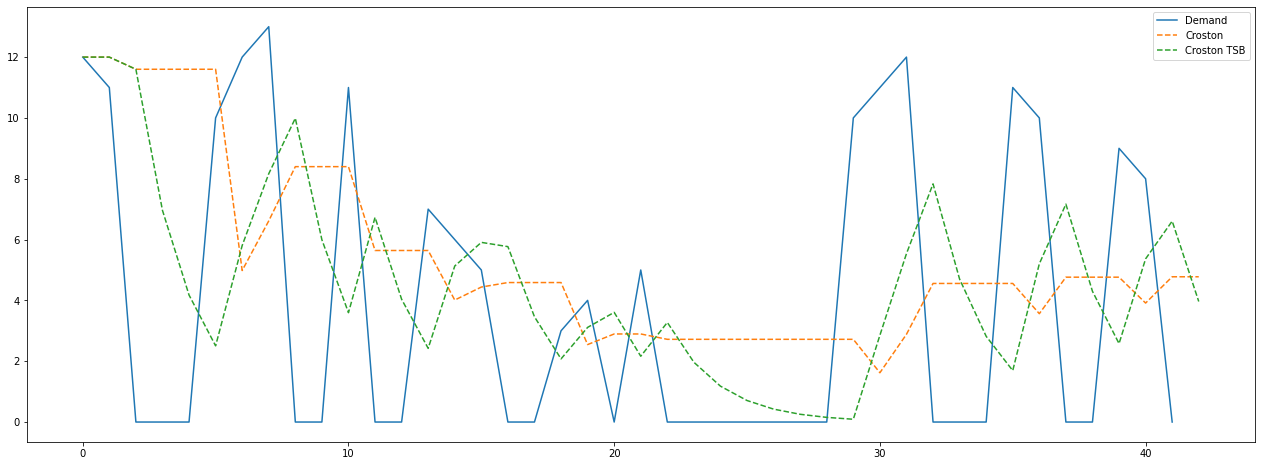

In [26]:
plt.figure(figsize=[22,8])
plt.plot(ts_cr['Demand'], label='Demand')
plt.plot(ts_cr['Forecast'], label='Croston', linestyle='--');
plt.plot(ts_tsb['Forecast'], label='Croston TSB', linestyle='--');
plt.legend();

### Credits & Links

https://towardsdatascience.com/croston-forecast-model-for-intermittent-demand-360287a17f5f